In [1]:
# Import the necessary library

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

# - Data Understanding

In [2]:
# Loading the data into the data frame.    
heart=pd.read_csv("heart.csv")

In [3]:
print('First 5 Rows Show')
heart.head()

First 5 Rows Show


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print('Last 5 Rows Show')
heart.tail()

Last 5 Rows Show


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Describe function is a function that allows analysis between the numerical values contained in the data set. 
# Using this function count, mean, std, min, max, 25%, 50%, 75%.
print('Show Describe\n')
heart.describe()

Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Create DataFrame contains explanation of the columns to be more clear 

col=heart.columns
col_desc=['Age','sex (1=male,0=female)',
'chest pain type (4 values)' ,'resting blood pressure' ,
'serum cholesterol in mg/dl' ,'fasting blood sugar > 120 mg/dl' ,
'resting electrocardiographic results (values 0,1,2)' ,'maximum heart rate achieved',
'exercise induced angina', 'ST depression induced by exercise relative to rest','the slope of the peak exercise ST segment',
'number of major vessels (0-3) colored by flourosopy',
'0 = normal; 1 = fixed defect; 2 = reversable defect -> it is a radioactive element injected into the bloodstream of the patient. Then the blood flow of the patient is observed while they are doing exercise and resting.',
'0 = no disease and 1 = disease']

desc= {'column':col, 'describtion': col_desc}
columns_describtion=pd.DataFrame(data=desc)
columns_describtion

,column,describtion
0,age,Age
1,sex,"sex (1=male,0=female)"
2,cp,chest pain type (4 values)
3,trestbps,resting blood pressure
4,chol,serum cholesterol in mg/dl
5,fbs,fasting blood sugar > 120 mg/dl
6,restecg,resting electrocardiographic results (values 0...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina
9,oldpeak,ST depression induced by exercise relative to ...


In [7]:
# Look at the columns names
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# Look at the number of rows and columns in the dataset
heart.shape

(1025, 14)

In [9]:
# Checking the types of data
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# Create DataFrame contains explanation of the columns to be more clear 

col=heart.columns
col_desc=['Age','sex (1=male,0=female)',
'chest pain type (4 values)' ,'resting blood pressure' ,
'serum cholesterol in mg/dl' ,'fasting blood sugar > 120 mg/dl' ,
'resting electrocardiographic results (values 0,1,2)' ,'maximum heart rate achieved',
'exercise induced angina', 'ST depression induced by exercise relative to rest','the slope of the peak exercise ST segment',
'number of major vessels (0-3) colored by flourosopy',
'0 = normal; 1 = fixed defect; 2 = reversable defect -> it is a radioactive element injected into the bloodstream of the patient. Then the blood flow of the patient is observed while they are doing exercise and resting.',
'0 = no disease and 1 = disease']

desc= {'column':col, 'describtion': col_desc}
columns_describtion=pd.DataFrame(data=desc)
columns_describtion

,column,describtion
0,age,Age
1,sex,"sex (1=male,0=female)"
2,cp,chest pain type (4 values)
3,trestbps,resting blood pressure
4,chol,serum cholesterol in mg/dl
5,fbs,fasting blood sugar > 120 mg/dl
6,restecg,resting electrocardiographic results (values 0...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina
9,oldpeak,ST depression induced by exercise relative to ...


In [11]:
# The resting electrocardiographic results, slope and oldpeak fields all relate to findings from an electrocardiogram. 
# The graphic shows the components of a normal ECG which measures voltage over time in the heart muscle. 

# The resting electrocardiographic results is used to look for 2 specific abnormalities in the resting ECG, 

# while slope and oldpeak are both based on comparisons of the resting ECG and the ECG while excercising.


# In the graphic, the ST segment is labeled and shown to be flat.
# The slope relates whether there is an abnormality in the shape of the ST segment
# (still hard to say what the difference between 1 = unsloping and 2 = flat could be). 


# Old peak is a measure of the depression occurring in the ST segment (mm).
# A value greater than 0.5mm indicates a weakened heart and an increased risk of cardiac events such as heart attack.
# ST depression is also associated with angina, another variable in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D183A85708>,
      dtype=object)

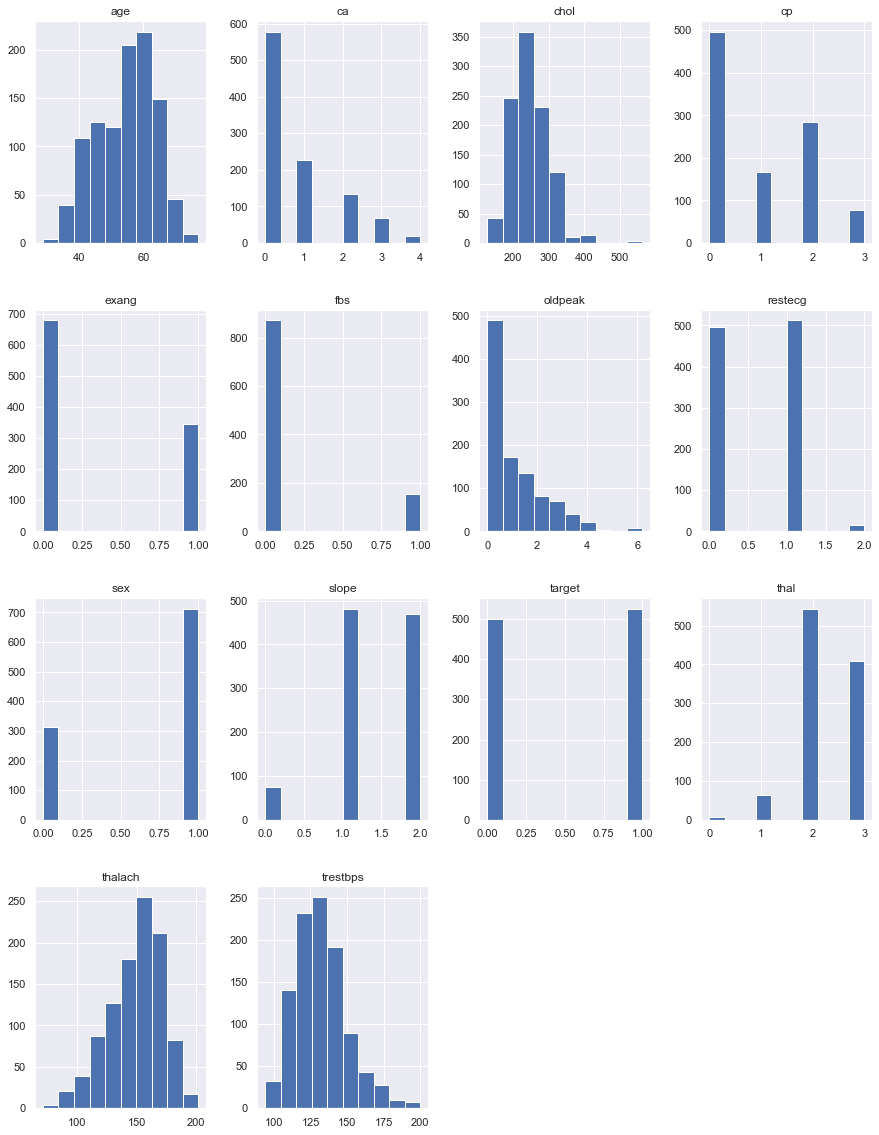

In [12]:
# Plot histogram to check the values distribution for all variables
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart.hist(ax = ax)

# Target

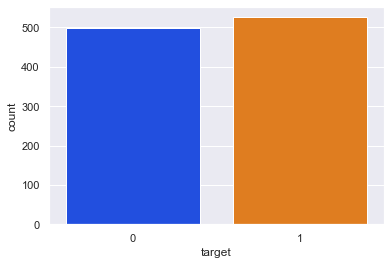

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [13]:
sns.countplot(x="target", data=heart, palette="bright")
plt.show()
countNoDisease = len(heart[heart.target == 0])
countHaveDisease = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart.target))*100)))

In [14]:
# 4. Dropping irrelevant columns
# 5. Renaming the columns
# 6. Dropping the duplicate rows
# 7. Dropping the missing or null values.
# 8. Detecting Outliers
# Plots - Heat Maps

In [15]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


# - Business Understanding

# Sex

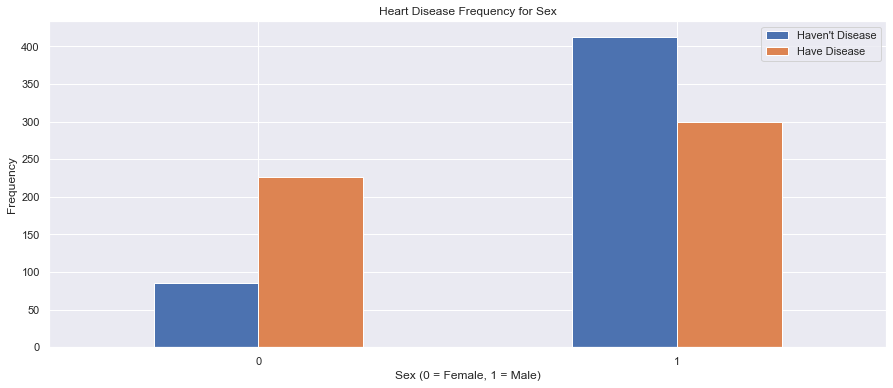

In [16]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
countFemale = len(heart[heart.sex == 0])
countMale = len(heart[heart.sex == 1])

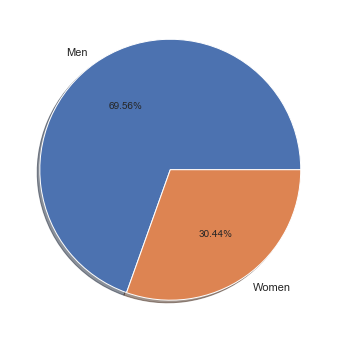

In [17]:
#print("Men vs Women Count\n", heart.sex.value_counts())
men_count = len(heart[heart['sex']== 1])
women_count = len(heart[heart['sex']==0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Men','Women'
sizes = [men_count,women_count]
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.2f%%', shadow=True)
plt.show()

# Age

In [18]:
heart.target.value_counts()

1    526
0    499
Name: target, dtype: int64

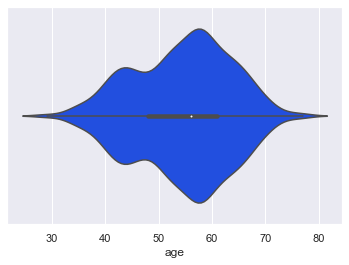

In [19]:
sns.violinplot(heart['age'],palette='bright')

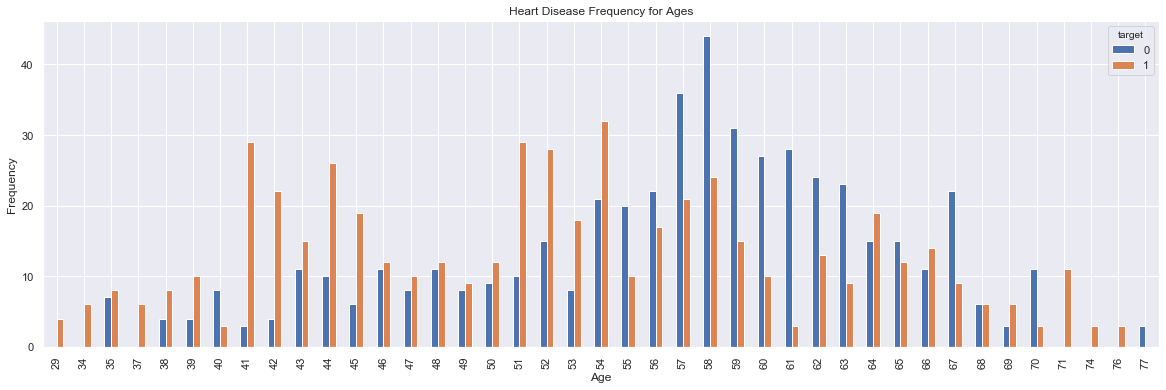

In [20]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
colors = ['#DAF7A6','#FF5733']
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Slop

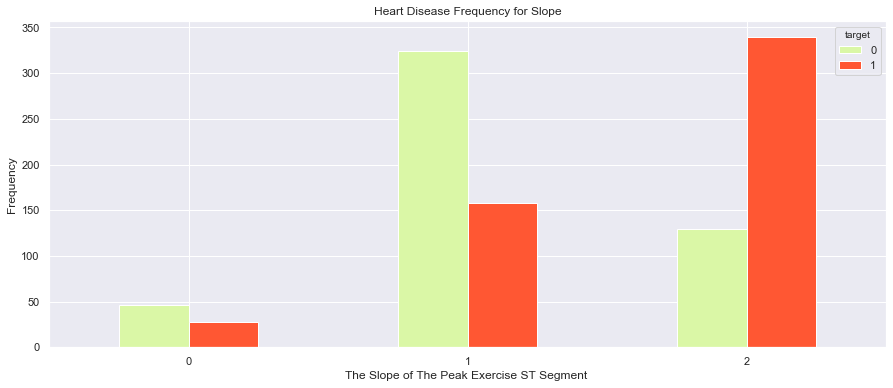

In [21]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

# fbs - fasting blood sugar 

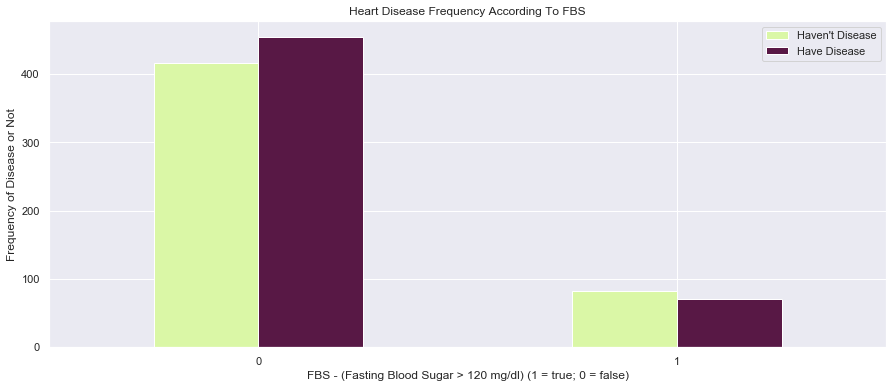

In [22]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [23]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


# chest pain type (4 values)

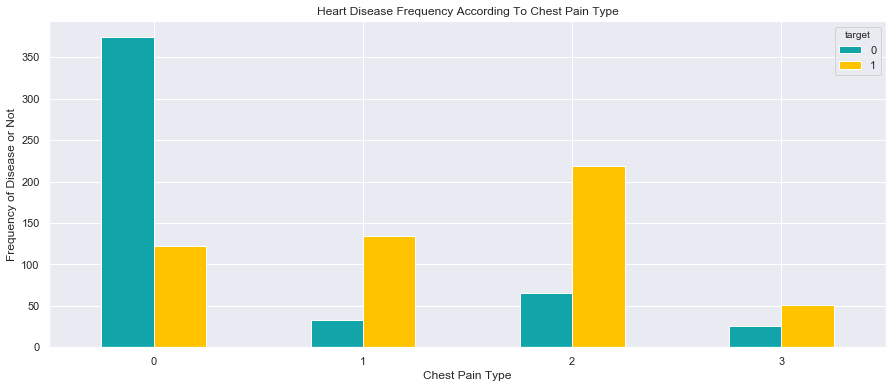

The likelihood of people suffering from chest pain developing heart disease: 0.435


In [24]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#FFC300' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

corr, _ = pearsonr(heart['cp'], heart['target']) 
print('The likelihood of people suffering from chest pain developing heart disease: %.3f' % corr) 

# - Prepare Data

In [25]:
# Checking the missing or null values.
heart.isnull().values.any()

False

In [26]:
# Creating Dummy Variables
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

In [27]:
frames = [heart, a, b, c]
heart = pd.concat(frames, axis = 1)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [28]:
heart.drop(['cp','thal','slope'],axis=1,inplace=True)

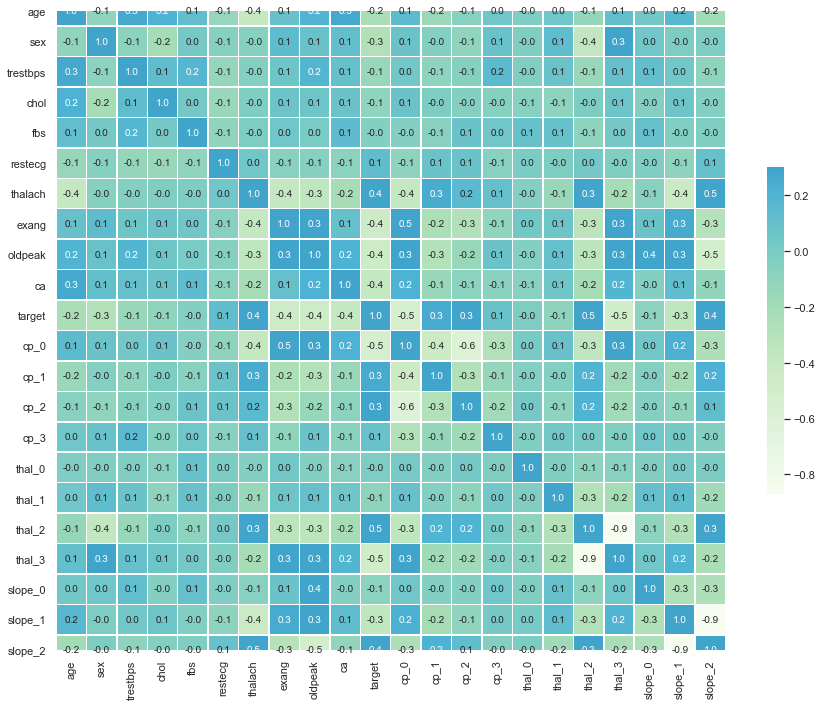

In [29]:
# Plot heatmap to show the correlation between all variables and the target

corr = heart.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,vmax=.3, center=0,square=True, linewidths=.5, 
                     cbar_kws={"shrink": .4},annot=True,cmap='GnBu',fmt=".1f",annot_kws={'size':10})

# - Data Modeling

In [30]:
# Determine input & output 
y = heart.target.values
x_data = heart.drop(['target'], axis = 1)

In [31]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [32]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [33]:
# Build models
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

# - Evaluate the result

In [34]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 85.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 85.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 98.0 % accuracy score


# - Performing hyperparameter tuning to improve the performance of  classifiers

In [35]:
# Using GridSearchCV to find the best parameters for each classifier


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


# K nearest Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

# RandomForest Classifier 
random_params = {'n_estimators':[1,500], 'max_depth':[1, 10]}

grid_random = GridSearchCV(RandomForestClassifier(), random_params)
grid_random.fit(x_train, y_train)
# random best estimator
random_clf = grid_random.best_estimator_

# - Evaluate the result after hyperparameter tuning

In [36]:
log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, x_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, x_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

random_score = cross_val_score(random_clf, x_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(random_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  84.63%
Knears Neighbors Cross Validation Score 94.02%
Support Vector Classifier Cross Validation Score 84.26%
DecisionTree Classifier Cross Validation Score 82.44%
RandomForest Classifier Cross Validation Score 98.78%


...

By : Aljawharah Aldukhayni